In [1]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

Importing plotly failed. Interactive plots will not work.


# Основен пример од документацијата на FB Prophet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


<Axes: title={'center': "Wikipedia pageviews for 'Peyton Manning'"}, xlabel='ds'>

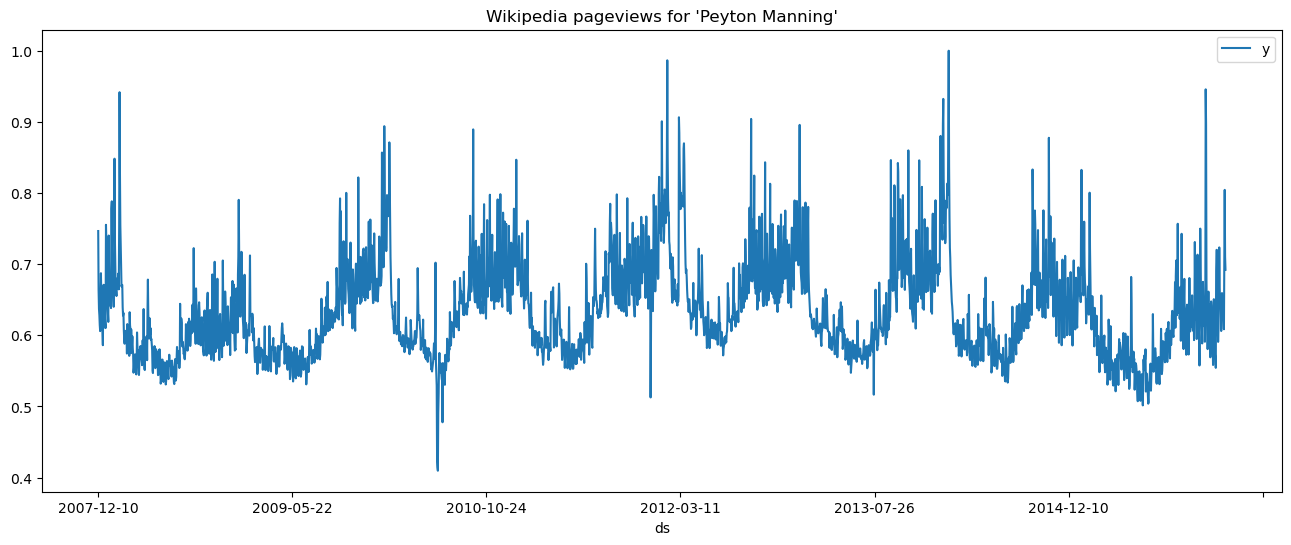

In [3]:
# Scale the data
df['y'] = df['y'] / df['y'].max()
df.plot(x='ds', y='y', figsize=(16, 6), title="Wikipedia pageviews for 'Peyton Manning'")

In [4]:
model = Prophet()
model.fit(df)

16:48:58 - cmdstanpy - INFO - Chain [1] start processing
16:48:58 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [6]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,0.639080,0.583538,0.695911
3266,2017-01-16,0.664380,0.603878,0.721930
3267,2017-01-17,0.647833,0.587210,0.701971
3268,2017-01-18,0.634805,0.578975,0.690567
3269,2017-01-19,0.635736,0.578207,0.692720


/home/jovan/miniconda3/envs/pymc_env/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/jovan/miniconda3/envs/pymc_env/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


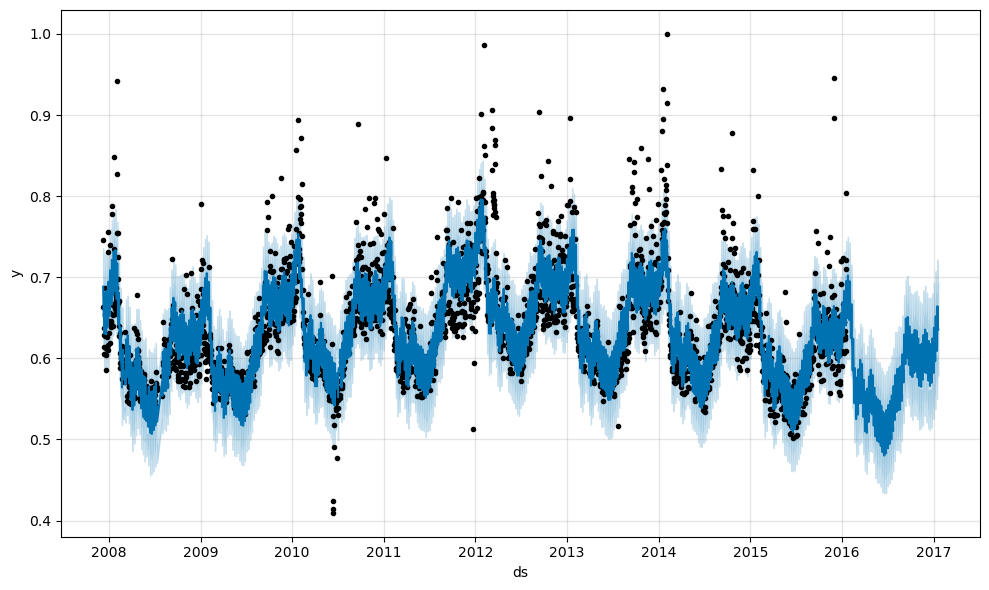

In [7]:
fig1 = model.plot(forecast)

# Cross validation на FB Prophet

In [12]:
df_cv = cross_validation(model, initial='730 days', period='1 days', horizon = '365 days')

  0%|          | 0/1869 [00:00<?, ?it/s]

16:54:08 - cmdstanpy - INFO - Chain [1] start processing
16:54:08 - cmdstanpy - INFO - Chain [1] done processing
16:54:09 - cmdstanpy - INFO - Chain [1] start processing
16:54:09 - cmdstanpy - INFO - Chain [1] done processing
16:54:09 - cmdstanpy - INFO - Chain [1] start processing
16:54:09 - cmdstanpy - INFO - Chain [1] done processing
16:54:09 - cmdstanpy - INFO - Chain [1] start processing
16:54:09 - cmdstanpy - INFO - Chain [1] done processing
16:54:09 - cmdstanpy - INFO - Chain [1] start processing
16:54:09 - cmdstanpy - INFO - Chain [1] done processing
16:54:09 - cmdstanpy - INFO - Chain [1] start processing
16:54:09 - cmdstanpy - INFO - Chain [1] done processing
16:54:09 - cmdstanpy - INFO - Chain [1] start processing
16:54:09 - cmdstanpy - INFO - Chain [1] done processing
16:54:10 - cmdstanpy - INFO - Chain [1] start processing
16:54:10 - cmdstanpy - INFO - Chain [1] done processing
16:54:10 - cmdstanpy - INFO - Chain [1] start processing
16:54:10 - cmdstanpy - INFO - Chain [1]

In [13]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-12-10,0.667694,0.632840,0.702516,0.653808,2009-12-09
1,2009-12-11,0.665184,0.630542,0.701073,0.663481,2009-12-09
2,2009-12-12,0.648787,0.612651,0.684641,0.652269,2009-12-09
3,2009-12-13,0.676692,0.641049,0.715223,0.707658,2009-12-09
4,2009-12-14,0.700066,0.662881,0.738543,0.759880,2009-12-09
...,...,...,...,...,...,...
677127,2016-01-16,0.667744,0.607405,0.724526,0.608498,2015-01-20
677128,2016-01-17,0.698465,0.642930,0.756605,0.721885,2015-01-20
677129,2016-01-18,0.722291,0.664246,0.780326,0.804388,2015-01-20
677130,2016-01-19,0.705408,0.646238,0.763022,0.710364,2015-01-20


In [14]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.002367,0.048652,0.035889,0.054091,0.044314,0.054076,0.708165
1,38 days,0.002388,0.048871,0.036080,0.054391,0.044569,0.054372,0.704743
2,39 days,0.002409,0.049077,0.036261,0.054675,0.044873,0.054652,0.701673
3,40 days,0.002428,0.049271,0.036434,0.054948,0.045106,0.054921,0.698796
4,41 days,0.002446,0.049459,0.036604,0.055215,0.045379,0.055184,0.696084
...,...,...,...,...,...,...,...,...
324,361 days,0.006472,0.080448,0.064435,0.101011,0.084410,0.099750,0.525469
325,362 days,0.006488,0.080547,0.064512,0.101160,0.084529,0.099889,0.525976
326,363 days,0.006504,0.080648,0.064590,0.101311,0.084674,0.100030,0.526362
327,364 days,0.006521,0.080752,0.064669,0.101463,0.084749,0.100173,0.526665


/home/jovan/miniconda3/envs/pymc_env/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/jovan/miniconda3/envs/pymc_env/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


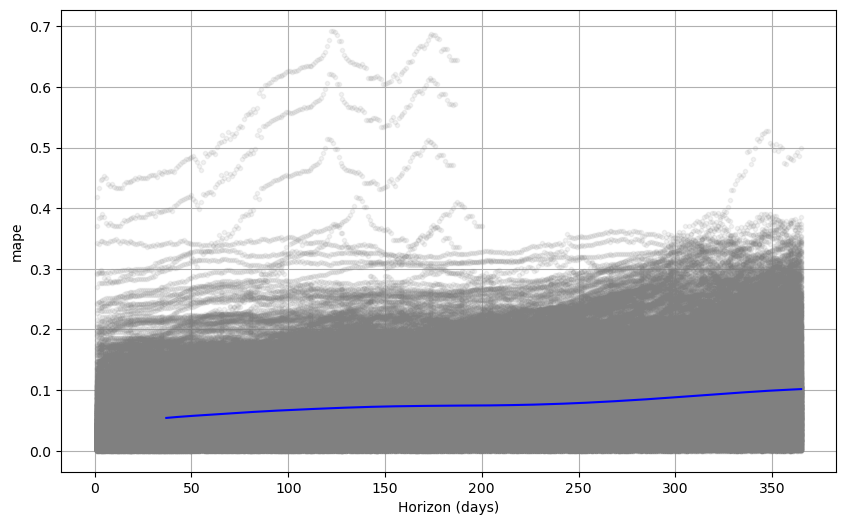

In [15]:
fig = plot_cross_validation_metric(df_cv, metric='mape')